# Table of Contents
 <p>

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [22]:
import numpy

import pycbc
from pycbc import (distributions, transforms, fft,
                   opt, psd, scheme, strain, weave)
from pycbc.waveform import generator

from pycbc import __version__
from pycbc import inference
from pycbc.inference import (models, burn_in, option_utils)

In [23]:
dist=distributions.Uniform(x=(-10,10),y=(-10,10))

In [24]:
dist.params

['x', 'y']

In [25]:
jd = distributions.JointDistribution(["x","y"], dist)

In [26]:
jd

In [27]:
model = models.models["test_normal"](["x","y"], prior=jd)
sampler = inference.sampler.emcee.EmceeEnsembleSampler(
    model, nwalkers=20, nprocesses=1, use_mpi=False)

In [28]:
sampler.setup_output(output_file="normal2d.hdf", force=True)

In [29]:
sampler.set_target(niterations=1000)

In [30]:
sampler.set_initial_conditions()

In [31]:
sampler.run()

In [32]:
sampler.finalize()

In [33]:
import h5py

In [34]:
ls

2d-uniform-sampler-notebook.ipynb  normal2d.hdf.checkpoint
normal2d.hdf.bkup


In [35]:
!ls -lrt

total 3416
-rw-r--r--  1 sebastian  staff   75468 26 Apr 10:43 2d-uniform-sampler-notebook.ipynb
-rw-r--r--  1 sebastian  staff  833604 26 Apr 10:44 normal2d.hdf.checkpoint
-rw-r--r--  1 sebastian  staff  833604 26 Apr 10:44 normal2d.hdf.bkup


In [36]:
f=h5py.File("normal2d.hdf.checkpoint","r")

In [37]:
list(f)

[u'sampler_info', u'samples']

In [38]:
list(f['samples'])

[u'logjacobian', u'loglikelihood', u'logprior', u'x', u'y']

In [39]:
f['samples/loglikelihood'].shape

(20, 1000)

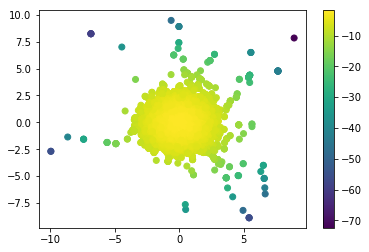

In [40]:
plt.figure()
plt.scatter(f['samples/x'], f['samples/y'], c=f['samples/loglikelihood'])
plt.colorbar()
plt.show()